<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter05/Detectron2_Chapter05_Default_Trainer.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05
## The dataset
Download the converted dataset.

In [1]:
!wget -q https://github.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/raw/main/datasets/braintumors_coco.zip
!unzip -q braintumors_coco.zip

## Train models
Installation

In [2]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-9zgzo3hu
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-9zgzo3hu
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 153 kB 77.7 MB/s 
     |████████████████████████████████| 1.5 MB 70.6 MB/s 
     |████████████████████████████████| 549 kB 65.6 MB/s 
     |████████████████████████████████| 117 kB 80.5 MB/s 
     |████████████████████████████████| 96 kB 6.7 MB/s 
     |████████████████████████████████| 182 kB 77.6 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp38-cp38-linux_x86_64.whl size=5458629 sha256=db76714480190a963fe651a80025ba6aee96724773efa022448cc2765dae0ad5
  Stored in directory: /tmp/pip-ephem-wheel-cache-mkxxky0z/wheels/19/ac/6

In [3]:
from detectron2.data.datasets import register_coco_instances
# Some configurations
name_ds = "braintumors_coco"
name_ds_train = name_ds + "_train"
name_ds_test = name_ds + "_test"
image_root_train = name_ds + "/train"
image_root_test = name_ds + "/test"
af = "_annotations.coco.json"
json_file_train = name_ds + "/train/" + af
json_file_test = name_ds + "/test/" + af
# Register datasets
## train dataset
register_coco_instances(
    name = name_ds_train,
    metadata = {},
    json_file = json_file_train,
    image_root = image_root_train
    )
## test dataset
register_coco_instances(
    name = name_ds_test,
    metadata = {},
    json_file = json_file_test,
    image_root = image_root_test
    )


### Training configuration

In [4]:
from detectron2.utils.logger import setup_logger
logger = setup_logger()

In [5]:
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo
import pickle

output_dir = "output/object_detector"
os.makedirs(output_dir, exist_ok=True)
output_cfg_path = os.path.join(output_dir, "cfg.pickle")
nc = 2
device = "cuda"

config_file_url = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

In [6]:
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file_url)
cfg.merge_from_file(config_file)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
# Set datasets
cfg.DATASETS.TRAIN = (name_ds_train,)
cfg.DATASETS.TEST = (name_ds_test,)
# Workers
cfg.DATALOADER.NUM_WORKERS = 2
# Images per batch
cfg.SOLVER.IMS_PER_BATCH = 8
# Learning rate
cfg.SOLVER.BASE_LR = 0.00025
# Iterations
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.CHECKPOINT_PERIOD = 500
# Classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = nc
cfg.MODEL.DEVICE = device
cfg.OUTPUT_DIR = output_dir

In [7]:
# save configuration file for future use
with open(output_cfg_path, "wb") as f:
  pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)

### Training

In [8]:
from detectron2.engine import DefaultTrainer
trainer = DefaultTrainer(cfg)
trainer.train()

[12/20 04:42:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:16, 9.96MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[12/20 04:43:01 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/20 04:43:45 d2.utils.events]:  eta: 2:24:59  iter: 19  total_loss: 1.39  loss_cls: 1.25  loss_box_reg: 0.0813  loss_rpn_cls: 0.04991  loss_rpn_loc: 0.00626  time: 1.6957  data_time: 0.0930  lr: 4.9953e-06  max_mem: 9625M
[12/20 04:44:20 d2.utils.events]:  eta: 2:25:43  iter: 39  total_loss: 1.213  loss_cls: 1.055  loss_box_reg: 0.08383  loss_rpn_cls: 0.05051  loss_rpn_loc: 0.005312  time: 1.7094  data_time: 0.0731  lr: 9.9902e-06  max_mem: 9625M
[12/20 04:44:54 d2.utils.events]:  eta: 2:23:39  iter: 59  total_loss: 0.8688  loss_cls: 0.7241  loss_box_reg: 0.09491  loss_rpn_cls: 0.03613  loss_rpn_loc: 0.005255  time: 1.7092  data_time: 0.0817  lr: 1.4985e-05  max_mem: 9625M
[12/20 04:45:29 d2.utils.events]:  eta: 2:23:34  iter: 79  total_loss: 0.5974  loss_cls: 0.441  loss_box_reg: 0.08854  loss_rpn_cls: 0.04329  loss_rpn_loc: 0.005925  time: 1.7178  data_time: 0.0734  lr: 1.998e-05  max_mem: 9625M
[12/20 04:46:03 d2.utils.events]:  eta: 2:21:55  iter: 99  total_loss: 0.4286  loss_cl

## Selecting the best model

In [10]:
model_names = []
max_iter = cfg.SOLVER.MAX_ITER
chp = cfg.SOLVER.CHECKPOINT_PERIOD
for i in range(1, max_iter//chp):
  model_names.append(f'model_{str(i*chp-1).zfill(7)}.pth')
model_names.append('model_final.pth')
print(model_names)

['model_0000499.pth', 'model_0000999.pth', 'model_0001499.pth', 'model_0001999.pth', 'model_0002499.pth', 'model_0002999.pth', 'model_0003499.pth', 'model_0003999.pth', 'model_0004499.pth', 'model_final.pth']


In [11]:
from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator
evaluator = COCOEvaluator(
    dataset_name = name_ds_test, 
    tasks=("bbox",), 
    distributed=False, 
    output_dir = os.path.join(output_dir, 'test_results')
    )

In [12]:
# evaluate all folders
import logging
logger.setLevel(logging.CRITICAL)
model_eval_results = []
for model_name in model_names:
  # load weights
  cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, model_name)
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
  # predictor
  predictor = DefaultPredictor(cfg)
  # evaluate
  x = trainer.test(cfg, predictor.model, evaluators=[evaluator])
  model_eval_results.append(x['bbox'])

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.320
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.352
 Average Recall     (AR) @[ IoU=0.50:0.

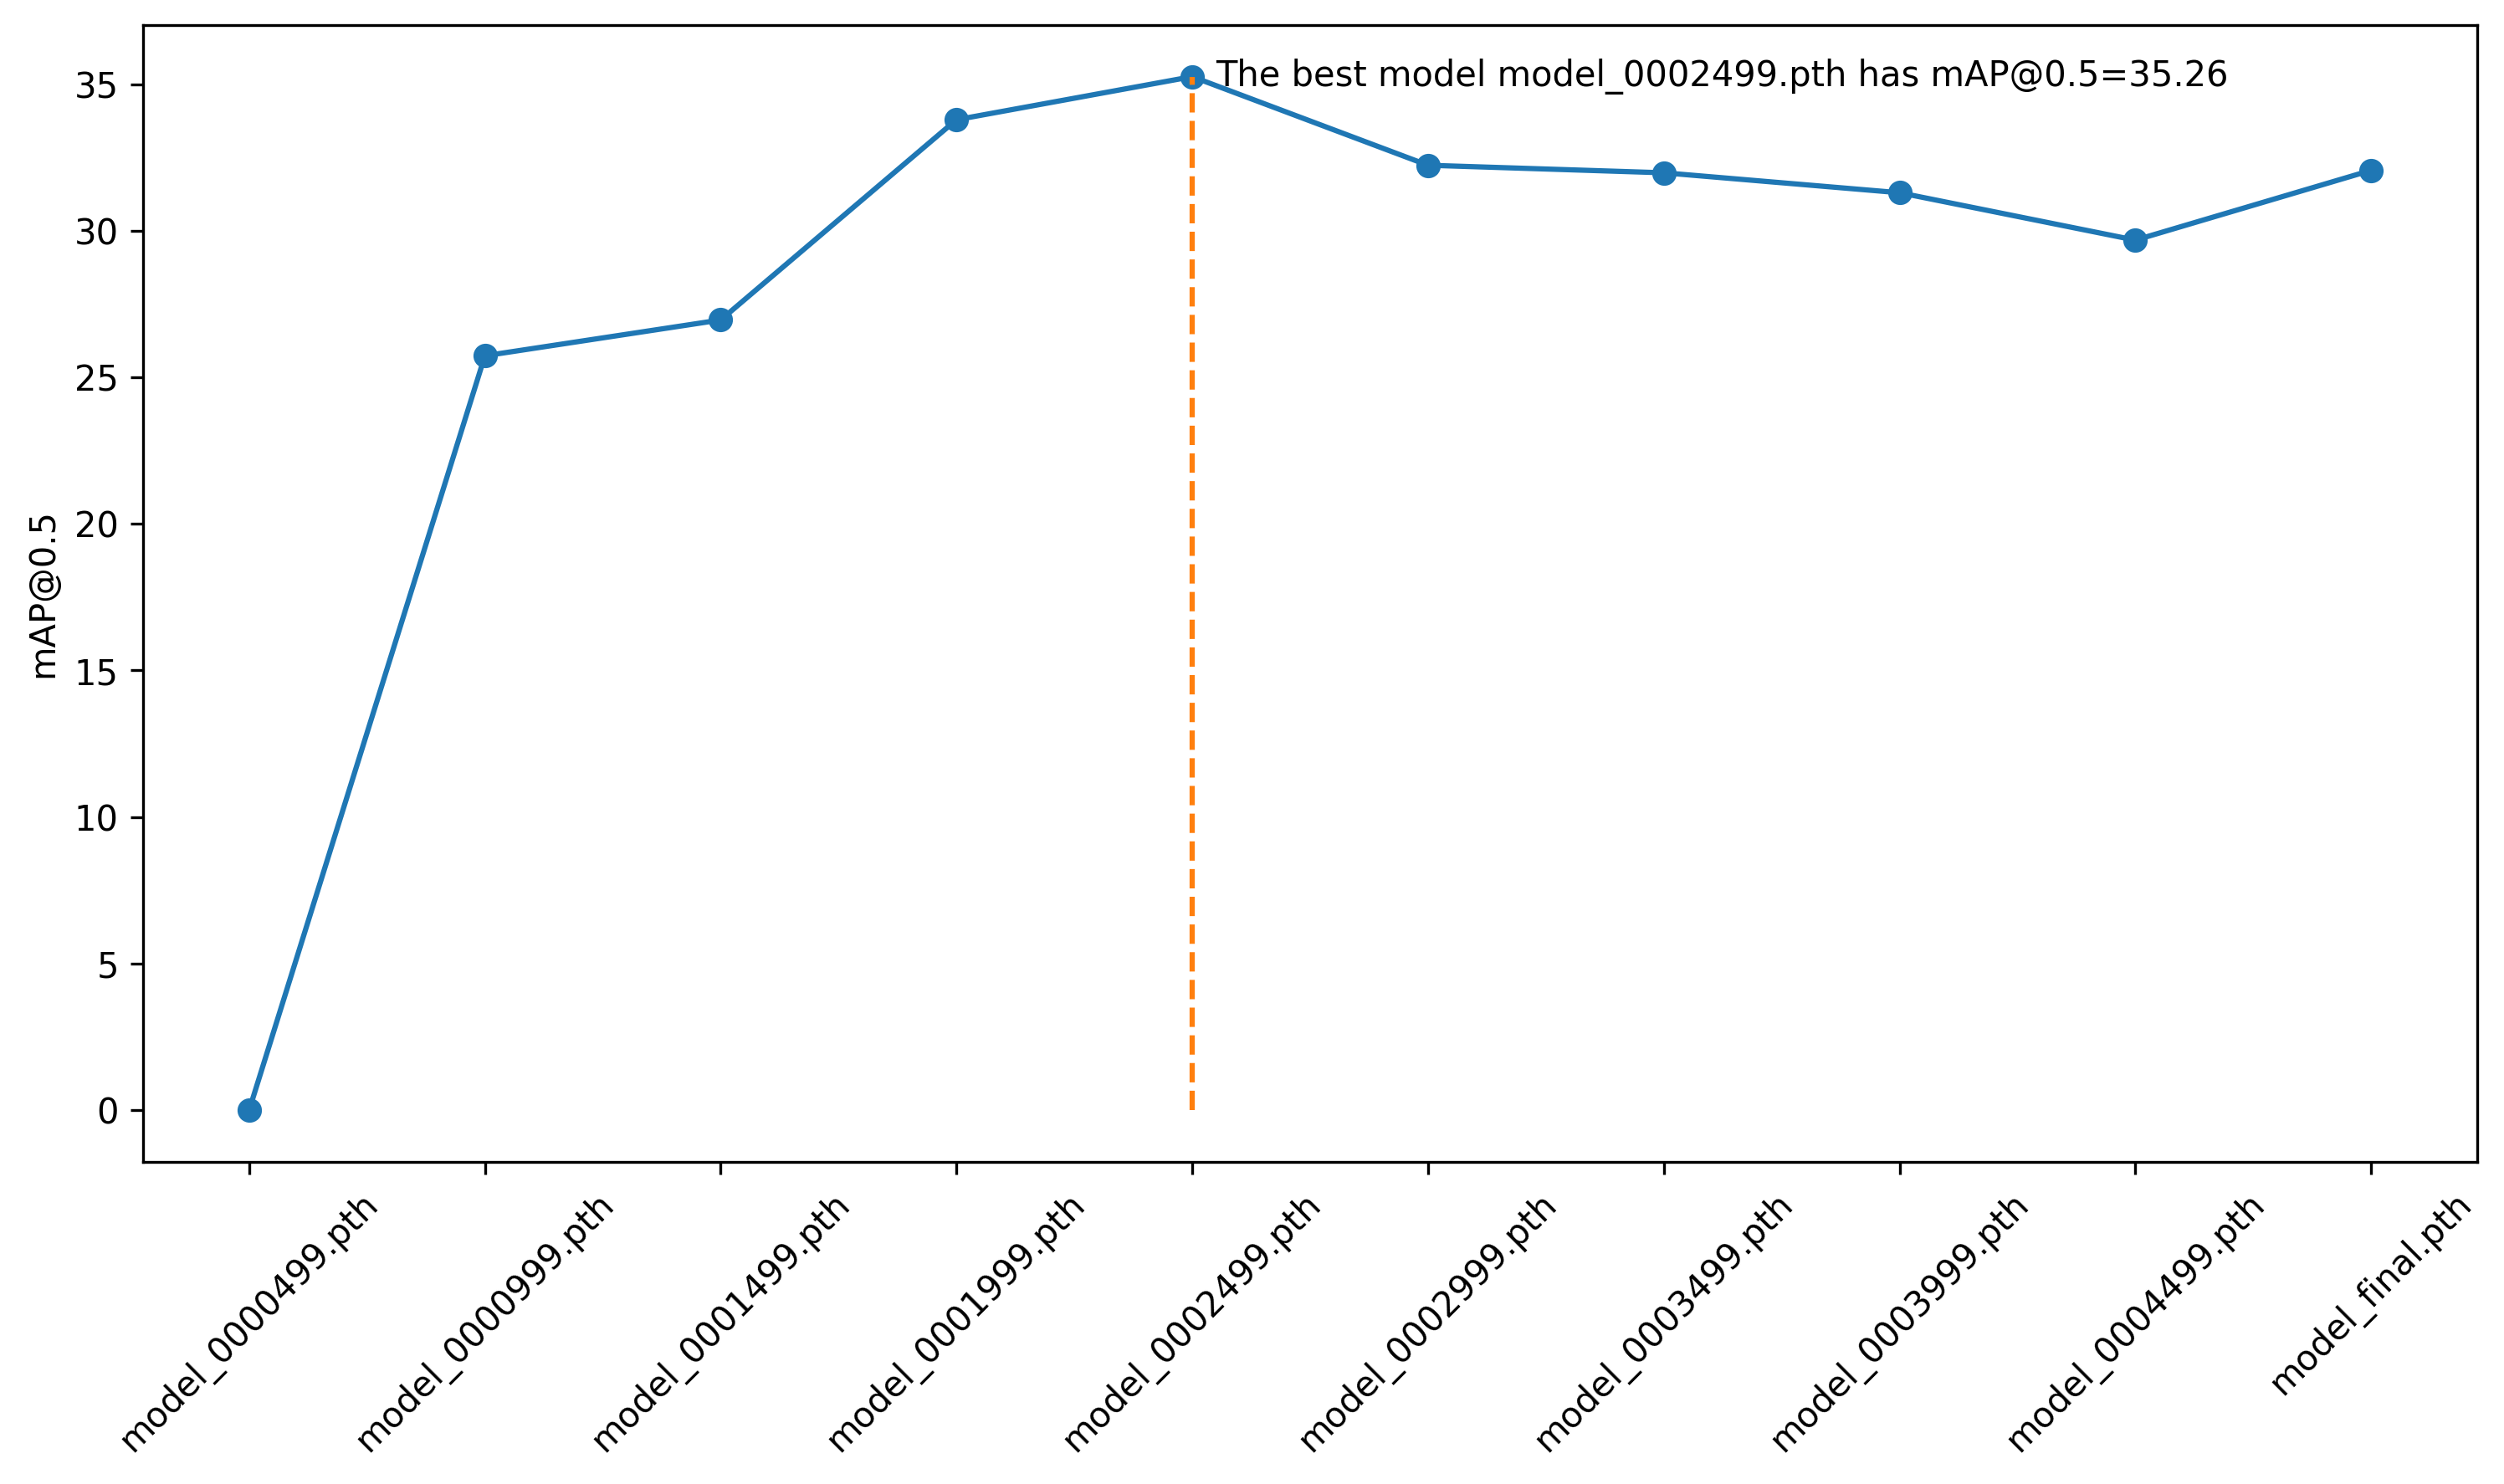

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

aps = [x['AP50'] if not math.isnan(x['AP50']) else 0 for x in model_eval_results]
best_model_idx = np.argmax(aps)
best_model_name = model_names[best_model_idx]
best_ap = aps[best_model_idx]
anno_text = f'The best model {best_model_name} has mAP@0.5={round(best_ap, 2)}'

plt.figure(figsize=(12, 6))
x = [i for i in range(len(aps))]
y = aps
plt.xticks(ticks=x, labels=model_names, rotation=45)
plt.plot(x, y)
plt.scatter(x, y)
plt.plot([best_model_idx, best_model_idx], [0, best_ap], '--')
plt.ylabel("mAP@0.5")
plt.text(best_model_idx+0.1, best_ap, anno_text, ha="left", va="center")
plt.show()

### Choosing a confidence threshold

In [14]:
thresh_tests = [0.1*i for i in range(10)]
thresh_eval_results = []
for thresh_test in thresh_tests:
  # load weights
  cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, best_model_name)
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = thresh_test
  # predictor
  predictor = DefaultPredictor(cfg)
  # evaluate
  x = trainer.test(cfg, predictor.model, evaluators=[evaluator])
  thresh_eval_results.append(x['bbox'])

Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.435
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.342
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.748
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.

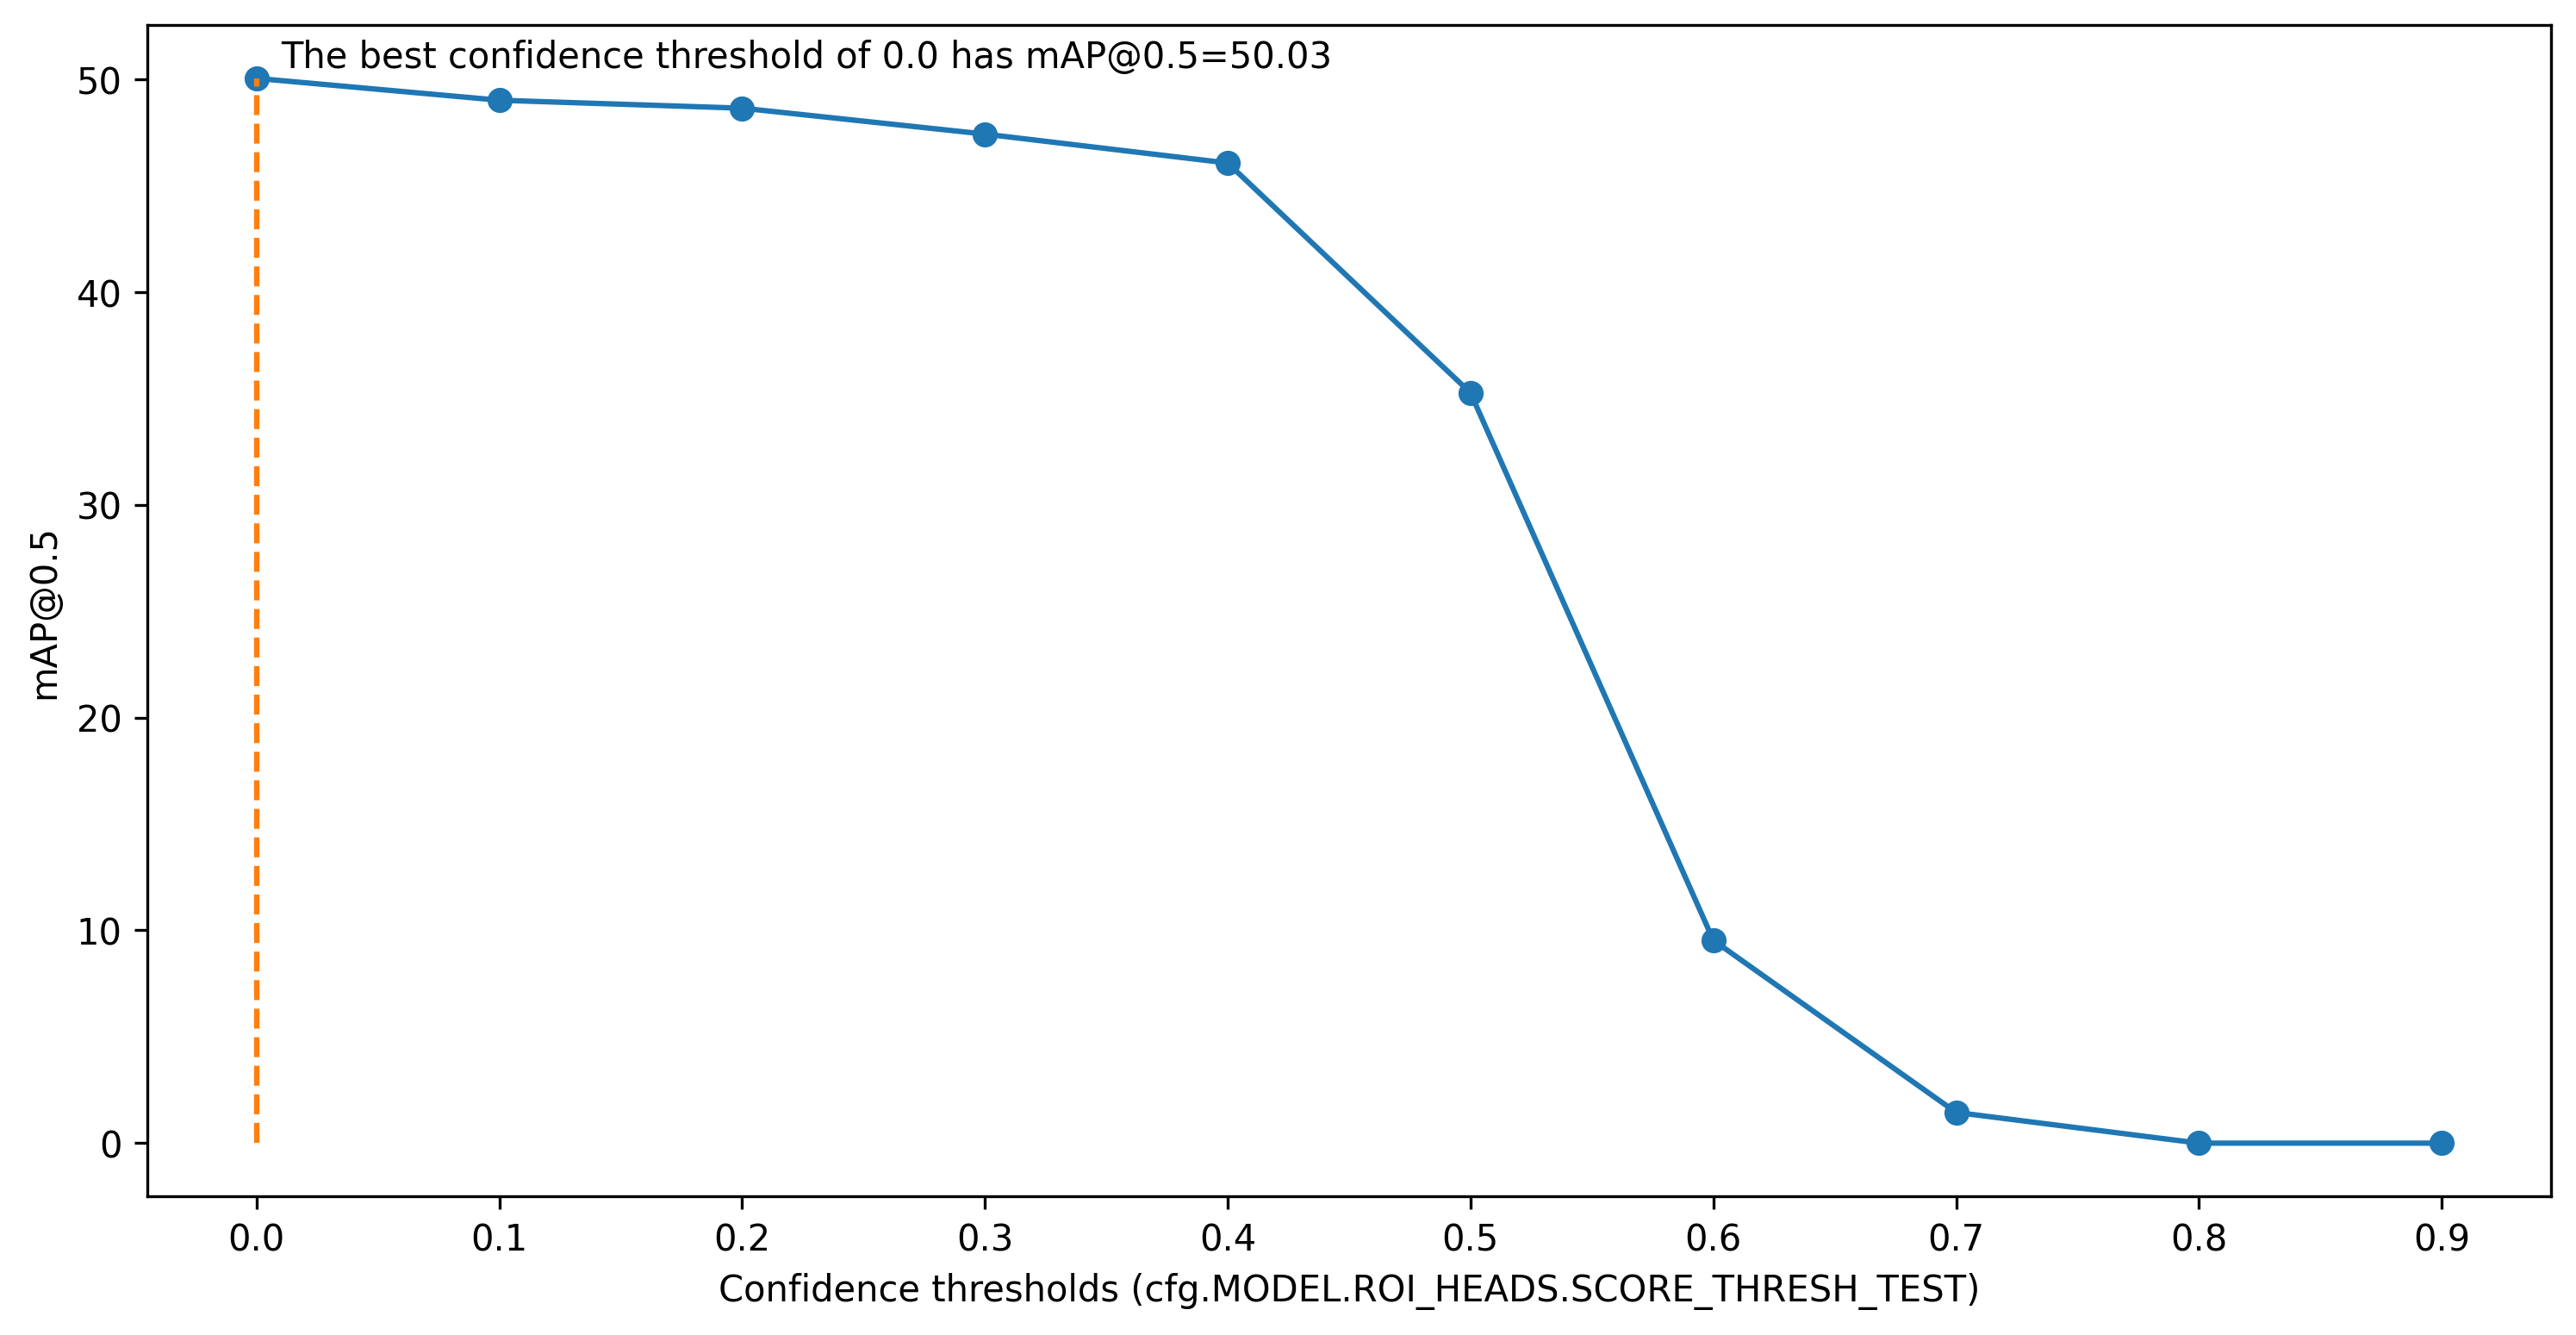

In [15]:
aps = [x['AP50'] if not math.isnan(x['AP50']) else 0 for x in thresh_eval_results]
best_thresh_idx = np.argmax(aps)
best_thresh = thresh_tests[best_thresh_idx]
best_ap = aps[best_thresh_idx]
anno_text = f'The best confidence threshold of {best_thresh} has mAP@0.5={round(best_ap, 2)}'

plt.figure(figsize=(12, 6))
x = [round(x, 2) for x in thresh_tests]
y = aps
plt.plot(x, y)
plt.scatter(x, y)
plt.xticks(ticks=thresh_tests, labels=x)
plt.plot([best_thresh, best_thresh], [0, best_ap], '--')
plt.xlabel("Confidence thresholds (cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST)")
plt.ylabel("mAP@0.5")
plt.text(best_thresh+0.01, best_ap+1, anno_text, ha="left", va="center")
plt.show()

### Sample values 

In [16]:
import random
random.seed(42)
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


def plot_random_samples(name_ds, n=3, predictor=None):
  # access
  ds = DatasetCatalog.get(name_ds)
  met = MetadataCatalog.get(name_ds)
  nrows = int(-(-n/3)) # ceil
  ncols = 3
  samples = random.sample(ds, n)
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(21, 7))
  for i,s in enumerate(samples):
    ax = axs[i//ncols][i%ncols] if len(axs.shape) == 2 else axs[i]
    img = cv2.imread(s["file_name"])
    v = Visualizer(img[:,:, ::-1], metadata=met, scale=0.5)
    # visualize ground-truths
    v = v.draw_dataset_dict(s)
    ax.imshow(v.get_image())
    ax.axis("off")
  plt.tight_layout()
  plt.show()
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(21, 7))
  for i,s in enumerate(samples):
    ax = axs[i//ncols][i%ncols] if len(axs.shape) == 2 else axs[i]
    img = cv2.imread(s["file_name"])
    # predict
    outputs = predictor(img)
    # visualize prediction results
    v = Visualizer(img[:,:, ::-1], metadata=met, scale=0.5)
    
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    ax.imshow(v.get_image())
    ax.axis("off")
  plt.tight_layout()
  plt.show()

In [17]:
# best model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST  = 0.5
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, best_model_name)
predictor = DefaultPredictor(cfg)

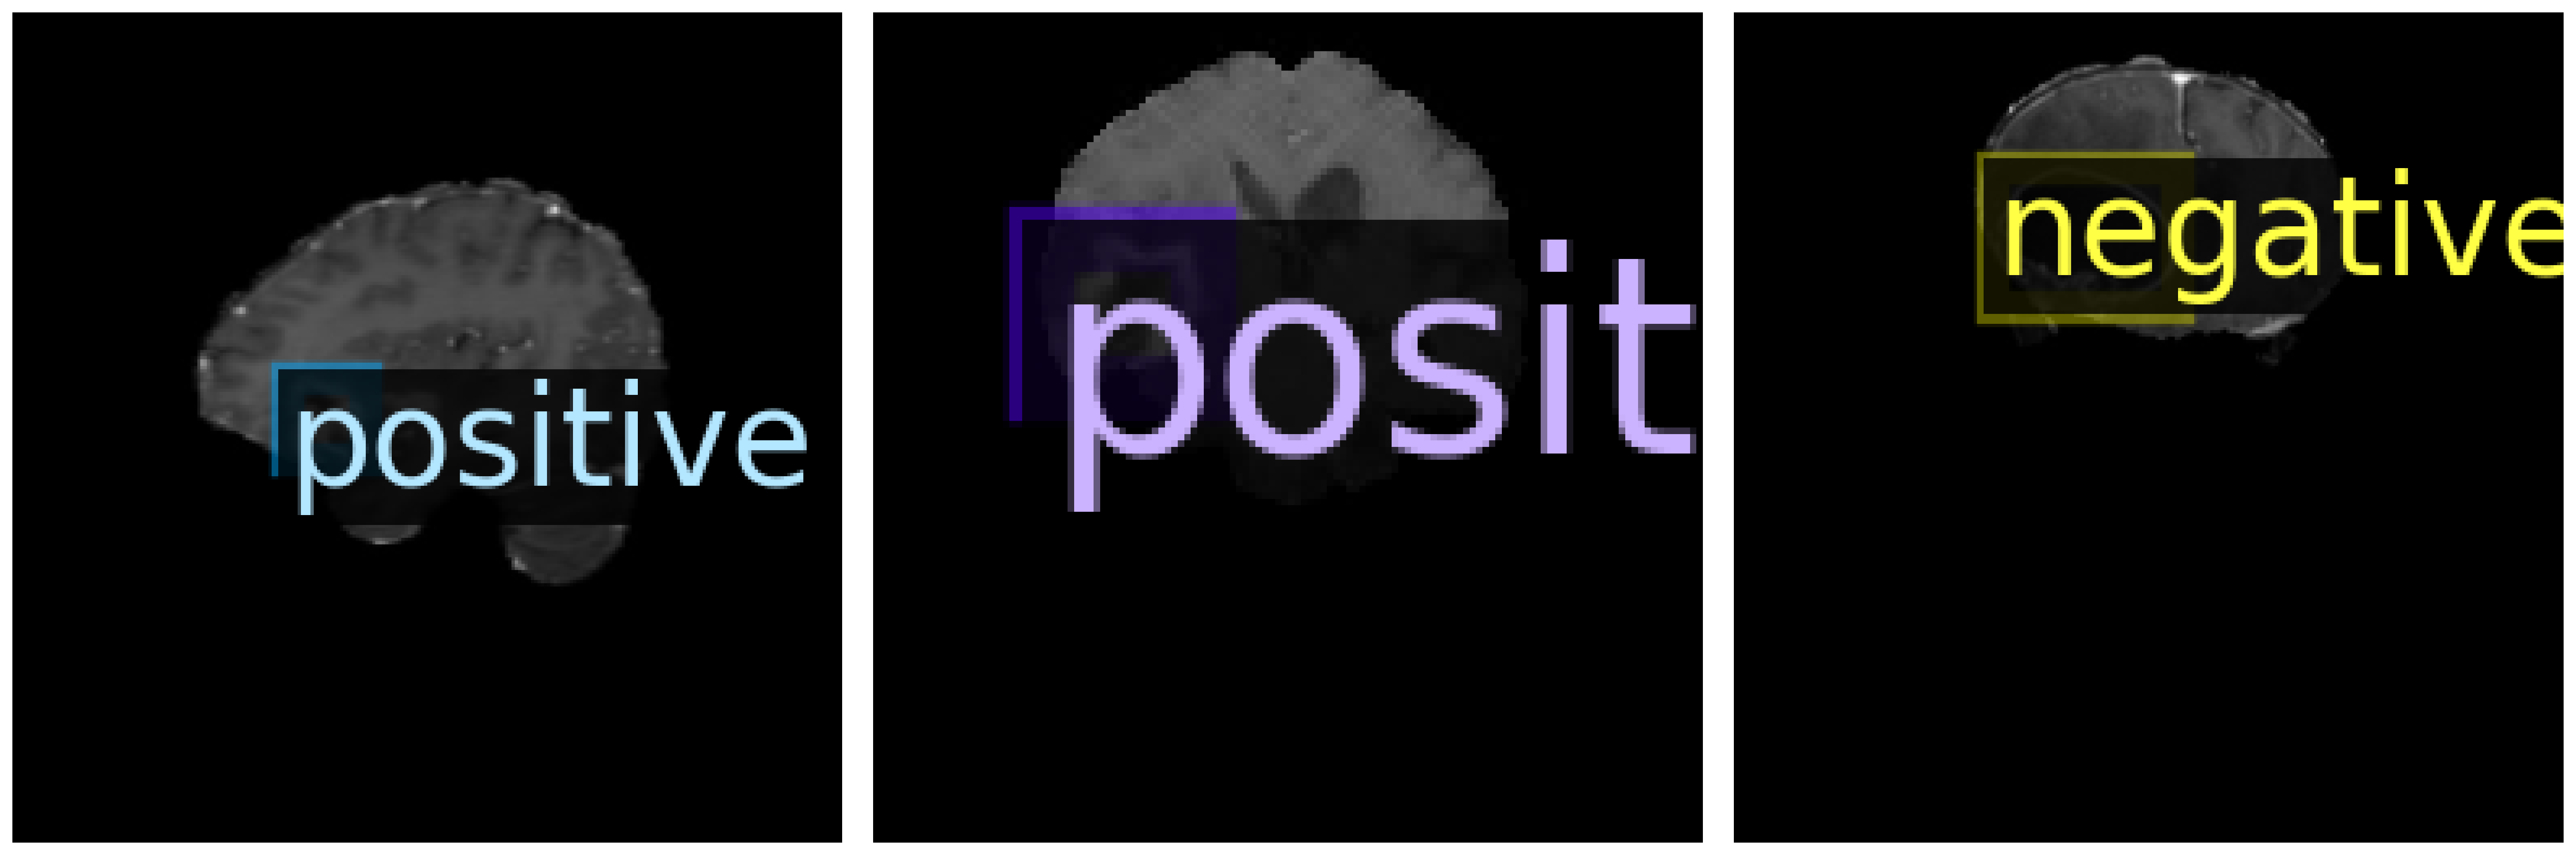

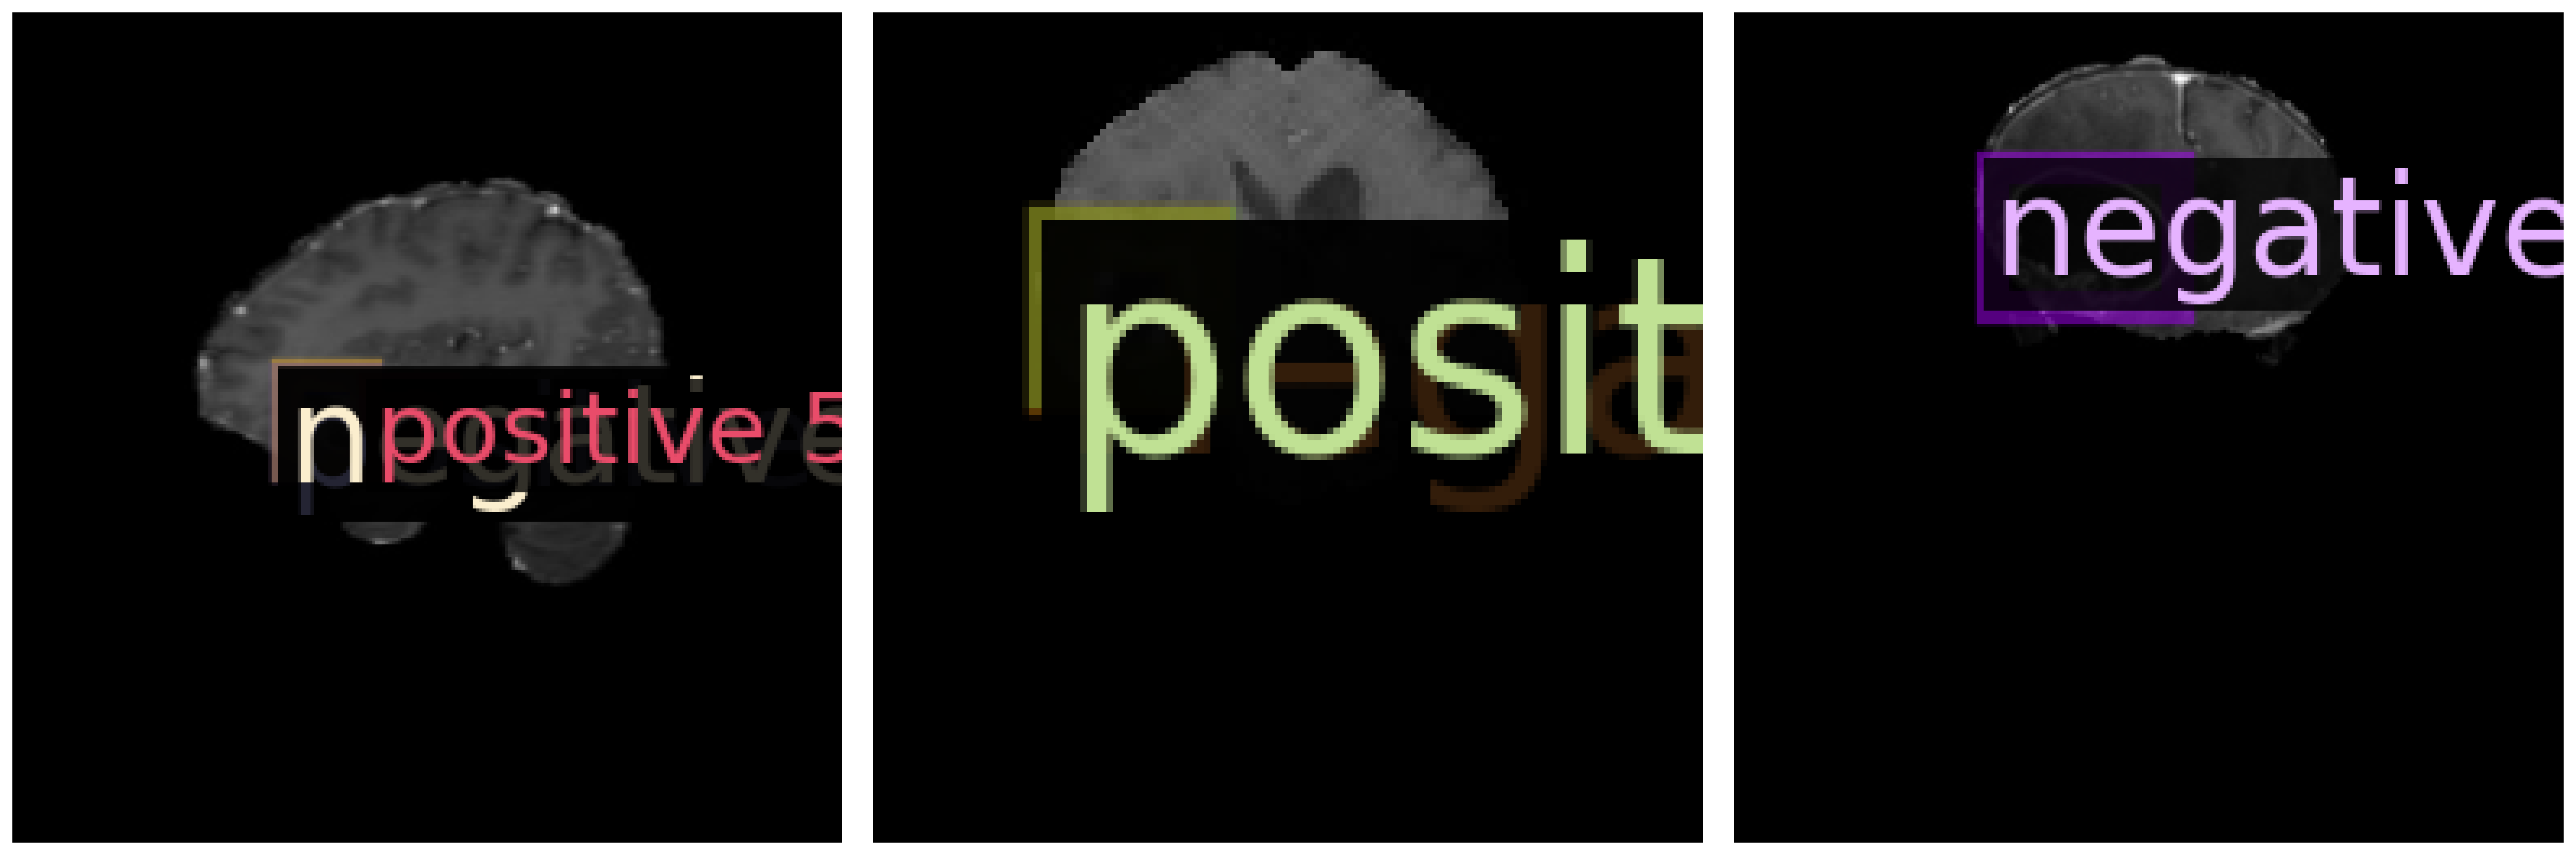

In [18]:
plot_random_samples(name_ds_test, predictor = predictor)